In [151]:
import numpy as np

I. Нахождение корней методом простой итерации

№12.4(и)

$f(x) = x^2 - e^x/5 = 0$

Вычислим подходящий метод для МПИ:

$1.  x_{k+1} = \pm \sqrt{\frac{e^x_k}{5}}$

$2.  x_{k+1} = \ln ({5x_k^2})$


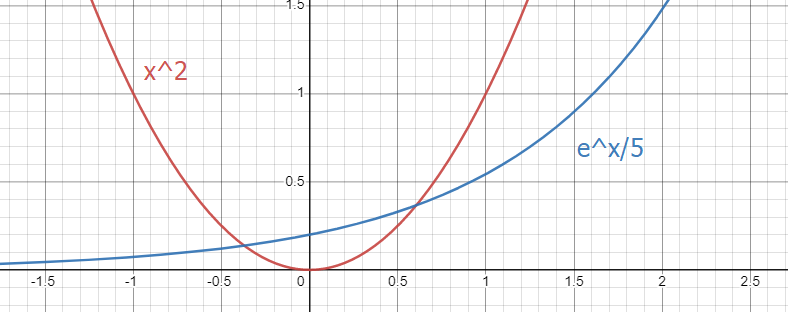

In [152]:
from IPython.display import Image
Image('./pictures/Newton_Method_image1.png')

Исходя из графика, возьмём отрезок локализации, равный [0.5; 1].
Вычислим первые производные для полученных ф-ций.

$\varphi_1^{'} = \pm \frac{1}{2} \sqrt{\frac{e^x}{5}}$

$\varphi_2^{'} = \frac{2}{x}$

$|\varphi_1^{'}| = \frac{1}{2} \sqrt{\frac{e^x}{5}}$

$|\varphi_2^{'}| = \frac{2}{|x|}$


Рассмотрим $|\varphi_2^{'}|$ на области локализации и проверим условие $|\varphi_2^{'}| \leq q < 1$. Обнаружим, что $\exists$ такая точка x* = 0.5, что условие не будет выполняться: $|\varphi_2^{'}| = 4$. Значит, функция $|\varphi_2^{'}|$ не подходит.

Для функции $|\varphi_1^{'}|$ условие будет выполнено. Значит, для МПИ подходит $|\varphi_1^{'}| = \frac{1}{2} \sqrt{\frac{e^x}{5}}$.

Тогда будем искать решение для $\varphi = \pm \sqrt{\frac{e^x_k}{5}}$.

In [153]:
precision = 1e-9
def phi_1(x):
    return (np.exp(x) / 5) ** 0.5
def phi_2(x):
    return -phi_1(x)

def sim(foo, x_0, precision):
  x = x_0
  step = 0
  while(1):
    cur = x
    x = foo(x)
    if step > 1:
      q = (x - cur) / (cur - prev)
      if (x - cur) <= (precision * (1 - q)):
        break
    prev = cur
    step += 1
  return x

x_1 = sim(phi_1, 0.5, precision)
x_2 = sim(phi_2, 0.5, precision)
print("x_1 = ", x_1)
print("x_2 =", x_2)


x_1 =  0.6052671211626723
x_2 = -0.3781293755942026


II. Нахождение корней методом Ньютона.

№12.7(г)

$\sin{x} - y = 1.32$

$\cos{y} - x = -0.85$

Можем привести эти уравнения к виду

$\sin{x} - y - 1.32 = 0$

$\cos{y} - x + 0.85 = 0$

Найдём матрицу Якоби для данной системы. Пусть $f_1 = \sin{x} - y - 1.32$, тогда $f_2 = \cos{y} - x + 0.85$.

Тогда 

$\frac{\partial f_1}{\partial x} = \cos{x}$

$\frac{\partial f_1}{\partial y} = -1$

$\frac{\partial f_2}{\partial x} = -1$

$\frac{\partial f_2}{\partial y} = -\sin{y}$


$$
J = \left(\begin{array}{cc} 
\cos{x} & -1\\
-1 & -\sin{y}
\end{array}\right)
$$ 

Вычислим $det J = 1 - \cos{x}\sin{y}$. Найдём обратную матрицу Якоби.

$$
J^{-1} = \frac{1}{1 - \cos{x}\sin{y}} \left(\begin{array}{cc} 
\sin{y} & -1\\
-1 & -\cos{x}
\end{array}\right)
$$ 

In [154]:
precision = 1e-5

def transpose(vec):
  return vec[:, 0]

def norm(x):
  norm = 0
  for i in range(x.shape[0]):
    val = np.abs(x[i])
    if val > norm:
      norm = val
  return norm

def reverse_Jacobi(col):
    x = col[0]
    y = col[1]
    matr = np.array([[0, 0], [0, 0]])
    det = 1 - np.cos(x) * np.sin(y)
    matr[0, 0] = np.sin(y)
    matr[0, 1] = -1
    matr[1, 0] = -1 
    matr[1, 1] = -np.cos(x)
    return matr

def foo_x(col):
    x = col[0]
    y = col[1]
    return np.sin(x) - y - 1.32

def foo_y(col):
    x = col[0]
    y = col[1]
    return np.cos(y) - x + 0.85

def foo(col):
    return np.array([[foo_x(col)], [foo_y(col)]])

def newton(x_0, reverse_Jacobi, foo, precision):
    x = x_0
    while(1):
        cur = x
        x = x - np.matmul(reverse_Jacobi(x), foo(transpose(x)))
        if(norm(transpose(x) - transpose(cur)) < precision):
            break
    return x

In [155]:
x_0 = np.array([[1], [1]])
x = newton(x_0, reverse_Jacobi, foo, precision)
print("The solution is:")
print(x)

The solution is:
[[ 1.79133722]
 [-0.3442208 ]]
